### Importação dos dados



In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = {
    'Loja 1': loja1,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4,
}

# formatei aqui a coluna 'Data de compra' para datetime64[ns], ela tava como object.
for nome, df in lojas.items():
  df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], format='mixed')


#1. Análise do faturamento


In [161]:
# Funcao que calcula o faturamento de cada loja
def calcular_faturamento(loja):
    total = (loja['Preço'].sum())
    return f"R${total:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Calculando o faturamento chamando o dicionário 'lojas'
# e fazendo cada loja ser iterada com a função que calcula o faturamento.
for nome, df in lojas.items():
    print(f'Faturamento total da {nome}: {calcular_faturamento(df)}')

Faturamento total da Loja 1: R$1.534.509,12
Faturamento total da Loja 2: R$1.488.459,06
Faturamento total da Loja 3: R$1.464.025,03
Faturamento total da Loja 4: R$1.384.497,58


A Loja 1 faturou 10.84% a mais que a Loja 4, que é a última loja.
A Loja 2 faturou 7.51% a mais que a Loja 4.
A Loja 3 faturou 5.74% a mais que a Loja 4.

# 2. Vendas por Categoria


In [162]:
tabela_categorias = {}

# Função que retorna a quantidade de produtos vendidos por categoria por loja
def qtd_vendido_categoria(loja):
    return loja.groupby('Categoria do Produto').size()

for nome, df in lojas.items():
  tabela_categorias[nome] = qtd_vendido_categoria(df)

df_comparativo = pd.DataFrame(tabela_categorias)
# Deixando os nomes da categoria com iniciais maiusculas
df_comparativo.index = df_comparativo.index.str.capitalize()
# Ordenando o dataframe para apresentar as categorias com maior venda pela loja 1
df_comparativo = df_comparativo.sort_values(by='Loja 1', ascending=False)

print(df_comparativo)

                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
Moveis                    465     442     499     480
Eletronicos               448     422     451     451
Brinquedos                324     313     315     338
Eletrodomesticos          312     305     278     254
Esporte e lazer           284     275     277     277
Instrumentos musicais     182     224     177     170
Livros                    173     197     185     187
Utilidades domesticas     171     181     177     201


# 3. Média de Avaliação das Lojas

In [163]:
# Função que retorna a média de avaliacao da loja escolhida
def media_avaliacao(loja):
    return f"{loja['Avaliação da compra'].mean():.2f}"

for nome, df in lojas.items():
    print(f'Média de avaliação da {nome}: {media_avaliacao(df)}')

Média de avaliação da Loja 1: 3.98
Média de avaliação da Loja 2: 4.04
Média de avaliação da Loja 3: 4.05
Média de avaliação da Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [164]:
# Função que retorna a quantidade de cada produto vendido na loja
def qtd_vendido_produto(loja):
    return loja.groupby('Produto').size()


# Três produtos empataram como mais vendidos
print(f'Os produtos mais vendidos foram:')
print()
for produto, qtd in qtd_vendido_produto(loja1).sort_values(ascending=False).head(3).items():
    print(f'{produto}: {qtd}')

Os produtos mais vendidos foram:

TV Led UHD 4K: 60
Micro-ondas: 60
Guarda roupas: 60


In [165]:
# Chamando os 2 últimos produtos que empataram como os menos vendidos.
# foi chamado o metodo tail(2) após visualmente definir quais foram os produtos
print(f'Os produtos menos vendidos foram:')
print()
for produto, qtd in qtd_vendido_produto(loja1).sort_values(ascending=False).tail(2).items():
    print(f'{produto}: {qtd}')

Os produtos menos vendidos foram:

Celular ABXY: 33
Headset: 33


## 5. Frete Médio por Loja


In [166]:
# Função que retorna o custo médio de frete da loja
def media_frete(loja):
    return f"{loja['Frete'].mean():.2f}"

for nome, df in lojas.items():
    print(f'Média do frete da {nome}: R$ {media_frete(df)}')

Média do frete da Loja 1: R$ 34.69
Média do frete da Loja 2: R$ 33.62
Média do frete da Loja 3: R$ 33.07
Média do frete da Loja 4: R$ 31.28


## 6. Lojas que mais venderam por categoria


In [167]:
campeao_por_categoria = {}

for categoria in df_comparativo.index:
    loja_campea = df_comparativo.loc[categoria].idxmax()
    quantidade = df_comparativo.loc[categoria].max()
    campeao_por_categoria[categoria] = (loja_campea, quantidade)

for categoria, (loja, qtd) in campeao_por_categoria.items():
    print(f'A {loja} foi a que mais vendeu {categoria} com a quantidade de {qtd}')

A Loja 3 foi a que mais vendeu Moveis com a quantidade de 499
A Loja 3 foi a que mais vendeu Eletronicos com a quantidade de 451
A Loja 4 foi a que mais vendeu Brinquedos com a quantidade de 338
A Loja 1 foi a que mais vendeu Eletrodomesticos com a quantidade de 312
A Loja 1 foi a que mais vendeu Esporte e lazer com a quantidade de 284
A Loja 2 foi a que mais vendeu Instrumentos musicais com a quantidade de 224
A Loja 2 foi a que mais vendeu Livros com a quantidade de 197
A Loja 4 foi a que mais vendeu Utilidades domesticas com a quantidade de 201


## 7. Média de faturamento por venda de cada loja

In [168]:
def media_faturamento(loja):
    return f"{loja['Preço'].mean():.2f}"

for nome, df in lojas.items():
    print(f"Média de faturamento de cada venda da {nome}: R${media_faturamento(df)}")
print()

Média de faturamento de cada venda da Loja 1: R$650.49
Média de faturamento de cada venda da Loja 2: R$630.97
Média de faturamento de cada venda da Loja 3: R$620.61
Média de faturamento de cada venda da Loja 4: R$587.15



A Loja 4 tem a pior média de faturamento global de todas com 5.39% de diferença para a menor média depois dela e 9.60% da Loja 1 que tem a maior média.

## 8. Média de faturamento por categoria

In [169]:
medias_por_categoria = {}

for nome, df in lojas.items():
    medias_por_categoria[nome] = df.groupby('Categoria do Produto')['Preço'].mean()

df_medias = pd.DataFrame(medias_por_categoria)
df_medias.index = df_medias.index.str.capitalize()
df_medias_formatado = df_medias.map(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

print(df_medias_formatado)

                            Loja 1       Loja 2       Loja 3       Loja 4
Categoria do Produto                                                     
Brinquedos                R$ 74,05     R$ 67,93     R$ 82,12     R$ 79,93
Eletrodomesticos       R$ 1.554,21  R$ 1.523,80  R$ 1.579,08  R$ 1.486,93
Eletronicos            R$ 1.278,26  R$ 1.298,04  R$ 1.214,41  R$ 1.210,57
Esporte e lazer          R$ 184,46    R$ 168,46    R$ 171,32    R$ 160,53
Instrumentos musicais    R$ 668,86    R$ 624,94    R$ 582,91    R$ 589,04
Livros                    R$ 67,71     R$ 68,30     R$ 68,46     R$ 66,46
Moveis                   R$ 538,02    R$ 532,21    R$ 537,27    R$ 534,80
Utilidades domesticas     R$ 99,01    R$ 108,63    R$ 113,45     R$ 99,99


# 9. Gráficos

#9.1 Participação no Faturamento Total de cada loja

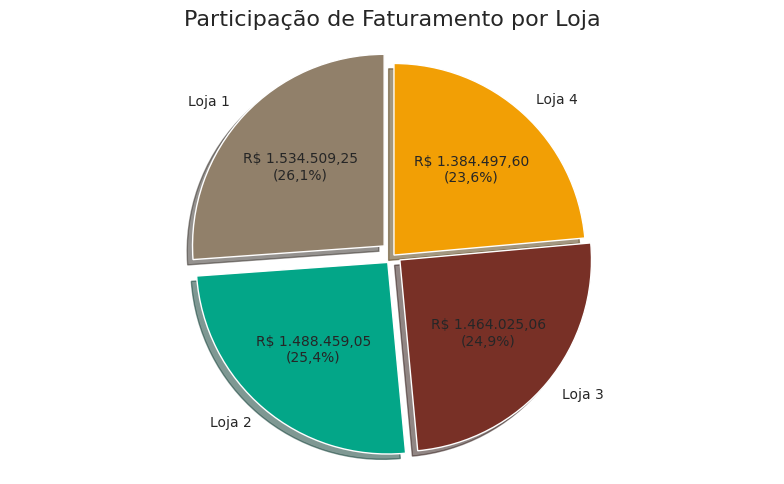

In [176]:
import matplotlib.pyplot as plt
import numpy as np


# Eu acessei o site da adobe color e copiei estas cores
cores = ['#91806A', '#03A688', '#783026', '#F29F05']
# criei aqui um eixo 'x' e 'y' a partir da função abaixo
def calcular_faturamento(loja):
    return (loja['Preço'].sum())
x = []
y = []
for nome, df in lojas.items():
    x.append(nome)
    y.append(calcular_faturamento(df))

# função para formatar os valores e apresenta-los junto aos percentuais
def formatar_autopct(valores):
  def func(pct):
    total = sum(valores)
    valor_abs = pct / 100 * total
    return f'R$ {valor_abs:,.2f}\n({pct:.1f}%)'.replace(',', 'X').replace('.', ',').replace('X', '.')
  return func

explode = (0.07,0.05,0.04,0)
plt.figure(figsize=(8,5))
plt.pie(
    y,
    labels=x,
    explode=explode,
    autopct=formatar_autopct(y),
    startangle=90,
    shadow=True,
    textprops={'size': 'smaller'},
    colors=cores)
plt.title('Participação de Faturamento por Loja', fontsize=16)
plt.axis('equal')
plt.tight_layout()

#9.2 Mapa de Calor - Categorias vendidas nas 4 lojas

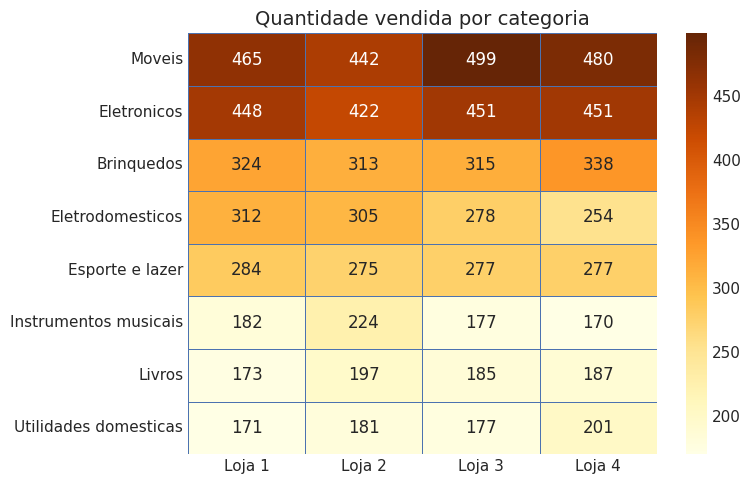

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

sns.heatmap(
    df_comparativo,
    annot=True,
    fmt='d',
    cmap='YlOrBr',
    linewidths=0.5,
    linecolor='b'
)
plt.title('Quantidade vendida por categoria', fontsize=14, loc='center')
plt.xlabel('', fontsize=10)
plt.ylabel('', fontsize=10)
plt.tight_layout()
plt.show()

#9.3 Média de Faturamento por venda por loja

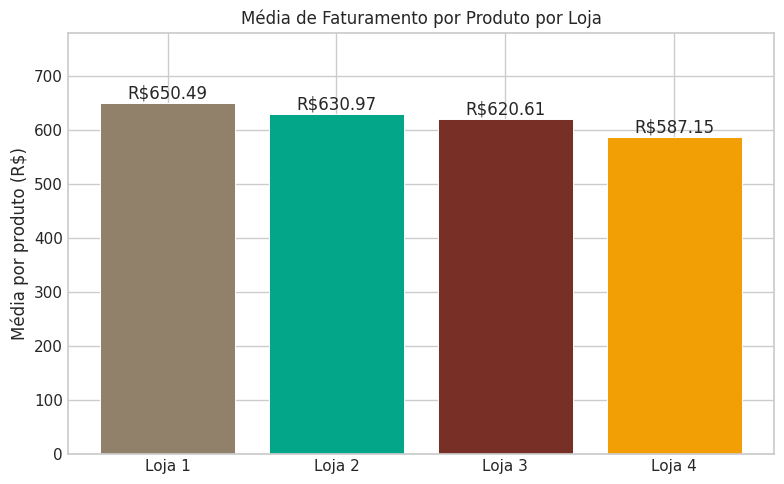

In [175]:
def media_faturamento(loja):
  return loja['Preço'].mean()
plt.style.use('_mpl-gallery')
x = []
y = []
for nome, df in lojas.items():
  x.append(nome)
  y.append(media_faturamento(df))

fig, ax = plt.subplots(figsize=(8,5))
cores = ['#91806A', '#03A688', '#783026', '#F29F05']
ax.bar(x, y, color=cores, edgecolor="white", linewidth=0.7)

ax.set_ylabel('Média por produto (R$)')
ax.set_title('Média de Faturamento por Produto por Loja')
ax.set_ylim(0, max(y) * 1.2)
ax.grid(False)

for i, valor in enumerate(y):
    ax.text(i, valor + 0.5, f"R${valor:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.grid(True)
plt.show()

#9.4 Distribuição de Avaliação de Compras por Lojas

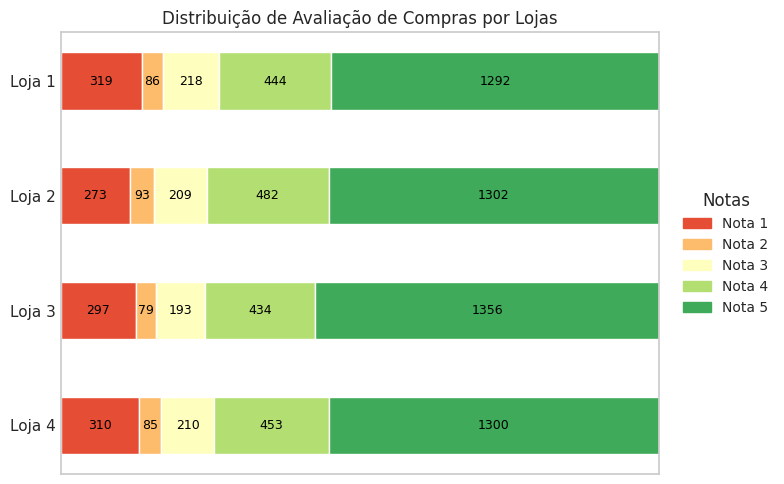

In [178]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

rating_counts_per_store = {}
for nome, df in lojas.items():
    rating_counts_per_store[nome] = (
        df['Avaliação da compra']
        .value_counts()
        .sort_index()
        .reindex(range(1, 6), fill_value=0)
        .to_dict())

categorias = ['Nota 1', 'Nota 2', 'Nota 3', 'Nota 4', 'Nota 5']
results = rating_counts_per_store

def aval(results, categorias):
    labels = list(results.keys())
    data = np.array([list(store_ratings.values()) for store_ratings in results.values()])
    data_cum = data.cumsum(axis=1)
    categoria_cores = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.set_title('Distribuição de Avaliação de Compras por Lojas')
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    legend_handles = []

    for i, (colname, color) in enumerate(zip(categorias, categoria_cores)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        color=color, label=colname)

        ax.bar_label(rects, label_type='center', color='black', fontsize=9)

        legend_handles.append(plt.Rectangle((0, 0), 1, 1, color=color))

    ax.legend(handles=legend_handles, labels=categorias,
              title='Notas', title_fontsize=12,
              loc='center left', bbox_to_anchor=(1.02, 0.5),
              fontsize=10, frameon=False)

    plt.subplots_adjust(right=0.75)
    plt.tight_layout()
    return fig, ax

fig, ax = aval(results, categorias)
plt.show()

## 9.5 Tendência das Vendas de Dezembro por Loja de 2020 a 2023

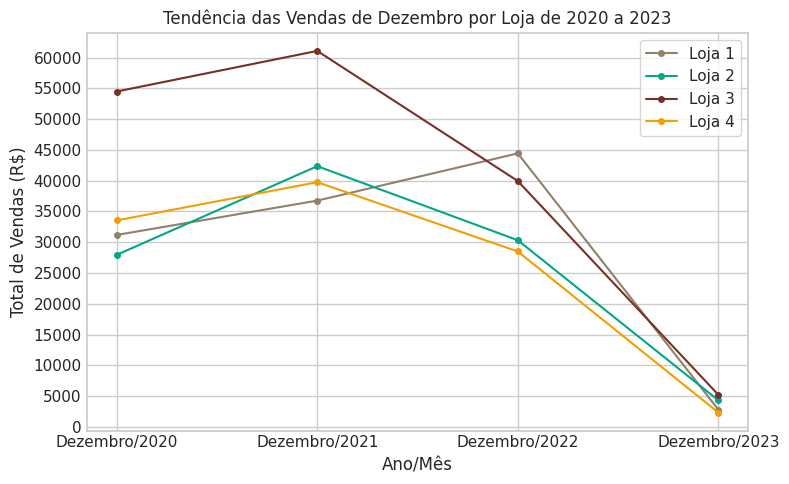

In [174]:
# função para armazenar as vendas totais de dezembro de cada loja
def sum_dezembro(loja):
  venda_por_loja = {}
  for ano in range(2020, 2024):
    df_dezembros = loja[(loja['Data da Compra'].dt.year == ano) & (loja['Data da Compra'].dt.month == 12)]
    soma_vendas = df_dezembros['Preço'].sum()
    soma_vendas = f'{soma_vendas:.2f}'
    venda_por_loja[f'Dezembro/{ano}'] = float(soma_vendas)
  return venda_por_loja

vendas_totais_dezembro = {}
for loja, df in lojas.items():
  vendas_totais_dezembro[loja] = sum_dezembro(df)

df_dezembro_vendas = pd.DataFrame(vendas_totais_dezembro)
cores = ['#91806A', '#03A688', '#783026', '#F29F05']
# Plotar a tendência das vendas de dezembro para cada loja
plt.figure(figsize=(8, 5))
for i, nome in enumerate(df_dezembro_vendas.columns):
    plt.plot(df_dezembro_vendas.index, df_dezembro_vendas[nome], marker='o', markersize=4, linestyle='-',color=cores[i], label=nome)

plt.title('Tendência das Vendas de Dezembro por Loja de 2020 a 2023')
plt.xlabel('Ano/Mês')
plt.ylabel('Total de Vendas (R$)')
plt.legend()
plt.yticks(np.arange(0,65000,5000))
plt.grid(True)
plt.tight_layout()
plt.show()

## 10 Conclusão

##  **Recomendação**

Diante de todas as informações geradas visualmente e das extrações feitas, a recomendação é de que a loja a ser vendida deve ser a **Loja 4**.


###  **Faturamento**
O principal fator decisivo é o seu **menor faturamento entre as quatro lojas**:

- A **Loja 1** faturou **10,84%** a mais que a Loja 4;  
- A **Loja 2** faturou **7,51%** a mais;
- A **Loja 3** faturou **5,74%** a mais.  

A diferença entre a **Loja 1 e a Loja 3** (penúltima colocada em faturamento) é de apenas **4,81%**, ou seja, **menos da metade da diferença Loja 1 x Loja 4**.


###  **Avaliação de Clientes**

Embora a **Loja 4 esteja em penúltimo lugar** na avaliação dos clientes, o *rating* das demais lojas não apresenta grandes disparidades em relação a ela.


### **Faturamento Médio por Produto**

- A **Loja 4 está em último lugar**, com diferença de **R\$ 63,34** para a **Loja 1** (melhor colocada)
- A diferença entre **Loja 1 e Loja 3** é de apenas **R\$ 29,88**.


###  **Desempenho no Mês de Dezembro**

O mês de **dezembro tradicionalmente representa o auge das vendas no varejo**, sendo considerado o **mês mais lucrativo do ano**.

Ao analisar os dados dos **últimos 4 anos**, verifica-se que a **Loja 4 apresentou desempenho consistentemente inferior**:

- Em **2 dos 4 anos**, foi a loja com **menor faturamento**
- Em **1 ano**, ficou em terceiro lugar
- Apenas no **primeiro ano**, ocupou a **segunda posição**

---

Essa consistência de baixo desempenho, mesmo no mês mais promissor do ano, reforça a **recomendação de venda da Loja 4** como medida estratégica para investir em outro negócio.
